In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from pykrx import stock

In [3]:
# 월말 종가 데이터 가져오기
df_rtn = stock.get_index_ohlcv('19950101', '20231231', '1001', 'm')
df_rtn = df_rtn[['종가']]
df_rtn

코스피,종가
날짜,
1995-01-31,925.56
1995-02-28,885.69
1995-03-31,931.78
1995-04-30,897.00
1995-05-31,882.50
...,...
2023-08-31,2556.27
2023-09-30,2465.07
2023-10-31,2277.99


In [4]:
for i in [1, 3, 6, 12]:
    df_rtn[f'수익률({i}개월, %)'] = df_rtn['종가'].pct_change(i) * 100
    
    # 연율화
    df_rtn[f'연수익률({i}개월,%)'] = df_rtn[f'수익률({i}개월, %)'] * (12 // i)
    
    # 연율화 : CAGR
    df_rtn[f'CAGR({i}개월, %)'] = ((df_rtn['종가']/df_rtn['종가'].shift(i))**(1/(i/12)) - 1)*100
    
    # 이동평균
    df_rtn[f'SMA({i}개월)'] = df_rtn[f'CAGR({i}개월, %)'].rolling(12).mean()
    # df_rtn[f'SMA({i}개월)'] = df_rtn[f'CAGR({i}개월, %)'].ewm(span = 12).mean()

In [5]:
col_month = [col for col in df_rtn.columns if col.startswith('수익률')]
print(col_month)

col_year = [col for col in df_rtn.columns if col.startswith('연수익률')]
print(col_year)

col_cagr = [col for col in df_rtn.columns if col.startswith('CAGR')]
print(col_cagr)

col_sma = [col for col in df_rtn.columns if col.startswith('SMA')]
print(col_sma)

['수익률(1개월, %)', '수익률(3개월, %)', '수익률(6개월, %)', '수익률(12개월, %)']
['연수익률(1개월,%)', '연수익률(3개월,%)', '연수익률(6개월,%)', '연수익률(12개월,%)']
['CAGR(1개월, %)', 'CAGR(3개월, %)', 'CAGR(6개월, %)', 'CAGR(12개월, %)']
['SMA(1개월)', 'SMA(3개월)', 'SMA(6개월)', 'SMA(12개월)']


<AxesSubplot:xlabel='날짜'>

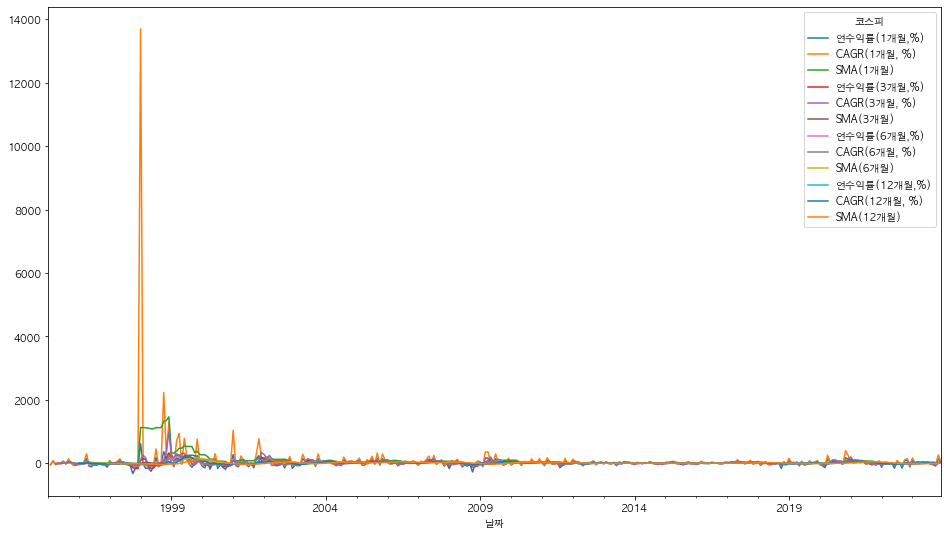

In [6]:
# 종가 
df_rtn.drop(columns=['종가']+col_month).plot(figsize=(16, 9))

<AxesSubplot:xlabel='날짜'>

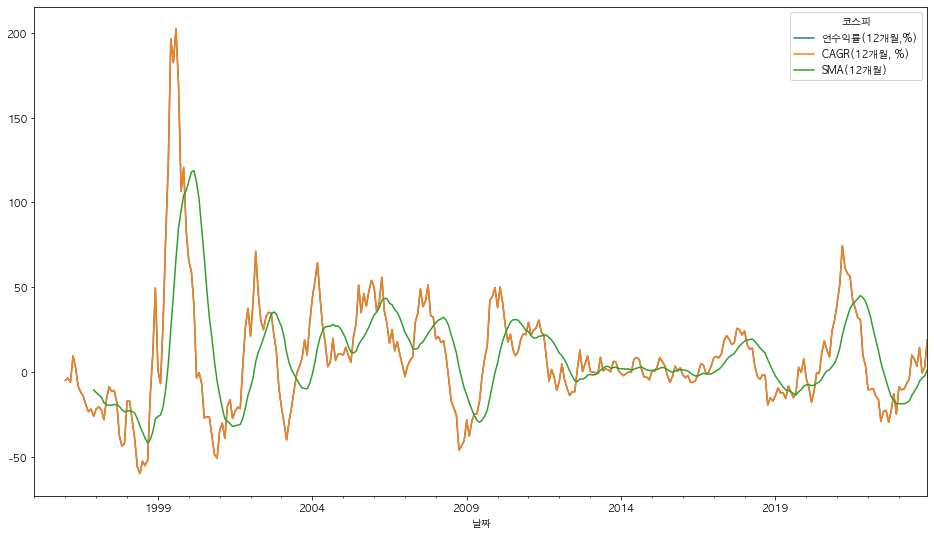

In [7]:
df_rtn[['연수익률(12개월,%)', 'CAGR(12개월, %)', 'SMA(12개월)']].plot(figsize=(16, 9))

In [8]:
# 정기예금금리 가져오기(출처: ECOS)

df_rate = pd.read_csv('../datasets/시장금리(일별)_04194502.csv').transpose()
df_rate.head()

,0,1,2
통계표,1.3.2.1. 시장금리(일별),1.3.2.1. 시장금리(일별),1.3.2.1. 시장금리(일별)
계정항목,"콜금리(1일, 전체거래)",CD(91일),국고채(1년)
단위,연%,연%,연%
변환,원자료,원자료,원자료
1999/12/03,4.81,6.87,NaN


In [9]:
df_rate.columns = df_rate.loc['계정항목']
df_rate.head()

계정항목,"콜금리(1일, 전체거래)",CD(91일),국고채(1년)
통계표,1.3.2.1. 시장금리(일별),1.3.2.1. 시장금리(일별),1.3.2.1. 시장금리(일별)
계정항목,"콜금리(1일, 전체거래)",CD(91일),국고채(1년)
단위,연%,연%,연%
변환,원자료,원자료,원자료
1999/12/03,4.81,6.87,NaN


In [10]:
df_rate = df_rate.iloc[4:]
df_rate.head()

계정항목,"콜금리(1일, 전체거래)",CD(91일),국고채(1년)
1999/12/03,4.81,6.87,NaN
1999/12/06,4.77,6.88,NaN
1999/12/07,4.75,6.89,NaN
1999/12/08,4.71,6.89,NaN
1999/12/09,4.74,6.9,NaN


In [11]:
# 인덱스를 시계열 데이터로 변환
df_rate.index = pd.to_datetime(df_rate.index)
df_rate

계정항목,"콜금리(1일, 전체거래)",CD(91일),국고채(1년)
1999-12-03,4.81,6.87,NaN
1999-12-06,4.77,6.88,NaN
1999-12-07,4.75,6.89,NaN
1999-12-08,4.71,6.89,NaN
1999-12-09,4.74,6.9,NaN
...,...,...,...
2022-01-24,1.352,1.46,1.438
2022-01-25,1.314,1.48,1.453
2022-01-26,1.261,1.49,1.455
2022-01-27,1.201,1.5,1.473


In [12]:
col_rate = df_rate.columns.tolist()
print(col_rate)

['  콜금리(1일, 전체거래)', 'CD(91일)', '국고채(1년)']


<AxesSubplot:>

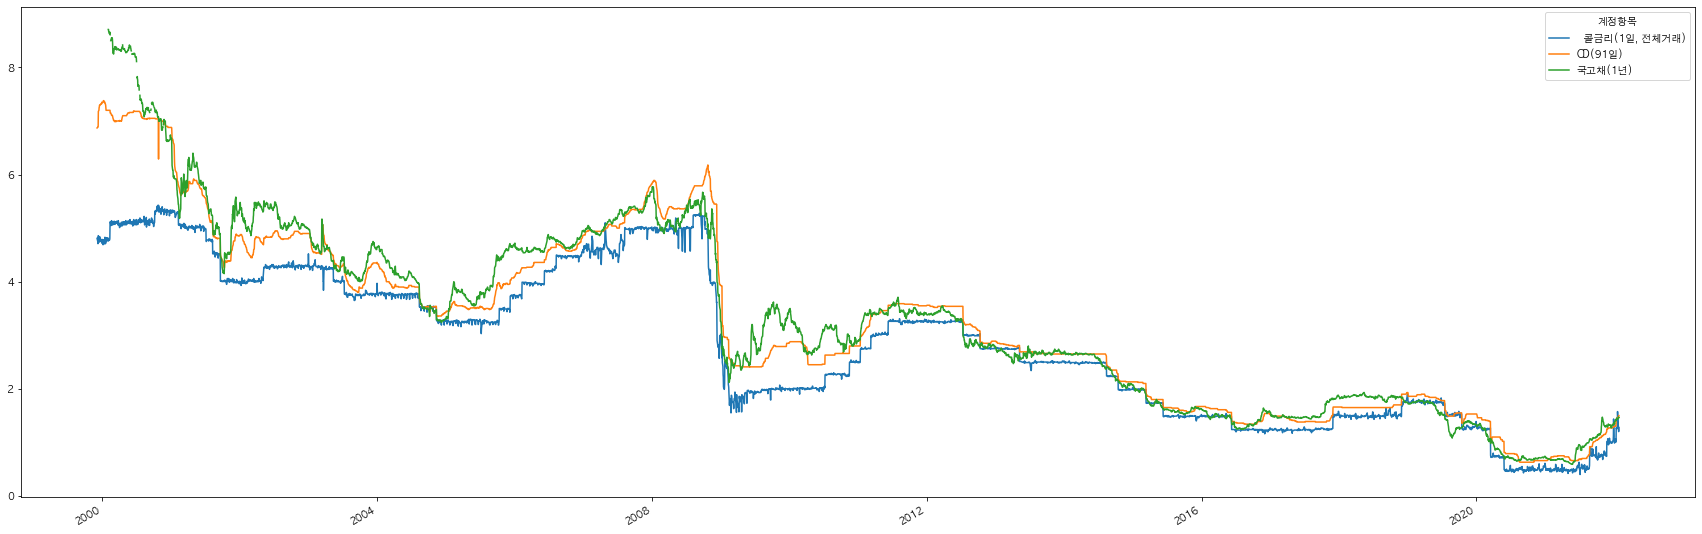

In [13]:
df_rate.plot(figsize=(30, 10))

In [14]:
# 월 기준 마지막 데이터 추출
# 인덱스는 월말 날짜로 변경
df_rate_month = df_rate.resample('M').last()
df_rate_month

계정항목,"콜금리(1일, 전체거래)",CD(91일),국고채(1년)
1999-12-31,4.790,7.34,NaN
2000-01-31,4.780,7.20,NaN
2000-02-29,5.070,7.01,8.250
2000-03-31,5.050,7.01,8.320
2000-04-30,5.060,7.10,8.320
...,...,...,...
2021-09-30,0.920,1.04,1.096
2021-10-31,0.760,1.12,1.410
2021-11-30,1.067,1.26,1.292
2021-12-31,1.437,1.29,1.350


데이터 합치기

In [15]:
df_rtn.index

DatetimeIndex(['1995-01-31', '1995-02-28', '1995-03-31', '1995-04-30',
               '1995-05-31', '1995-06-30', '1995-07-31', '1995-08-31',
               '1995-09-30', '1995-10-31',
               ...
               '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', name='날짜', length=348, freq='M')

In [16]:
df_rate_month.index

DatetimeIndex(['1999-12-31', '2000-01-31', '2000-02-29', '2000-03-31',
               '2000-04-30', '2000-05-31', '2000-06-30', '2000-07-31',
               '2000-08-31', '2000-09-30',
               ...
               '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
               '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
               '2021-12-31', '2022-01-31'],
              dtype='datetime64[ns]', length=266, freq='M')

In [17]:
df = pd.merge(
    df_rtn, df_rate_month,
    left_index=True, right_index=True,
    how='left'
)
df = df.dropna()
df.head()

,종가,"수익률(1개월, %)","연수익률(1개월,%)","CAGR(1개월, %)",SMA(1개월),"수익률(3개월, %)","연수익률(3개월,%)","CAGR(3개월, %)",SMA(3개월),"수익률(6개월, %)","연수익률(6개월,%)","CAGR(6개월, %)",SMA(6개월),"수익률(12개월, %)","연수익률(12개월,%)","CAGR(12개월, %)",SMA(12개월),"콜금리(1일, 전체거래)",CD(91일),국고채(1년)
날짜,,,,,,,,,,,,,,,,,,,,
2000-02-29,828.38,-12.236725,-146.840700,-79.118877,264.143947,-16.884394,-67.537576,-52.276718,108.779485,-11.675268,-23.350535,-21.987417,122.303327,59.285467,59.285467,59.285467,117.844859,5.07,7.01,8.25
2000-03-31,860.94,3.930563,47.166759,58.825186,210.035717,-16.256675,-65.026701,-50.818610,100.655474,2.961085,5.922170,6.009850,97.982220,39.090116,39.090116,39.090116,118.712754,5.05,7.01,8.32
2000-04-30,725.39,-15.744419,-188.933027,-87.200761,124.126071,-23.148070,-92.592279,-65.116575,78.489768,-12.971650,-25.943300,-24.260663,75.295185,-3.614186,-3.614186,-3.614186,111.855814,5.06,7.10,8.32
2000-05-31,731.88,0.894691,10.736294,11.280683,127.019870,-11.649243,-46.596972,-39.068608,50.135303,-26.566733,-53.133466,-46.075553,57.680772,-0.562485,-0.562485,-0.562485,101.669545,5.12,7.16,8.35
2000-06-30,821.22,12.206919,146.483030,298.323252,86.138449,-4.613562,-18.454248,-17.215977,22.523165,-20.120225,-40.240451,-36.192216,42.460148,-6.996602,-6.996602,-6.996602,84.717487,5.16,7.18,8.11


In [18]:
col_rate

['  콜금리(1일, 전체거래)', 'CD(91일)', '국고채(1년)']

<AxesSubplot:xlabel='날짜'>

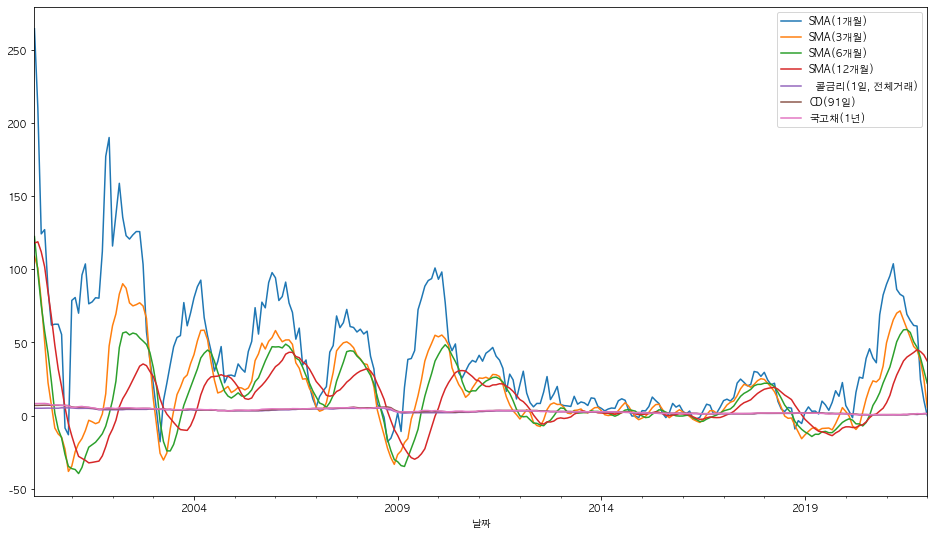

In [19]:
df[col_sma + col_rate].plot(figsize=(16, 9))

In [20]:
df.columns

Index(['종가', '수익률(1개월, %)', '연수익률(1개월,%)', 'CAGR(1개월, %)', 'SMA(1개월)',
       '수익률(3개월, %)', '연수익률(3개월,%)', 'CAGR(3개월, %)', 'SMA(3개월)', '수익률(6개월, %)',
       '연수익률(6개월,%)', 'CAGR(6개월, %)', 'SMA(6개월)', '수익률(12개월, %)',
       '연수익률(12개월,%)', 'CAGR(12개월, %)', 'SMA(12개월)', '  콜금리(1일, 전체거래)',
       'CD(91일)', '국고채(1년)'],
      dtype='object')

In [21]:
# 2000년대 데이터부터 남기기
year_start = '2000'
df_final = df.loc[year_start:, ['SMA(12개월)', '국고채(1년)']]
df_final

,SMA(12개월),국고채(1년)
날짜,,
2000-02-29,117.844859,8.250
2000-03-31,118.712754,8.320
2000-04-30,111.855814,8.320
2000-05-31,101.669545,8.350
2000-06-30,84.717487,8.110
...,...,...
2021-09-30,43.151535,1.096
2021-10-31,45.002862,1.410
2021-11-30,43.790271,1.292


<AxesSubplot:xlabel='날짜'>

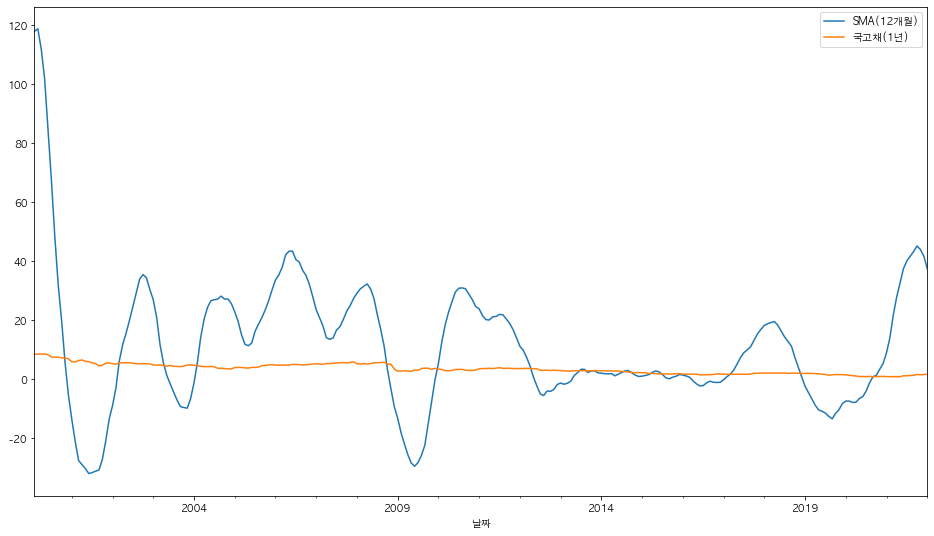

In [22]:
df_final.plot(figsize=(16, 9))

In [23]:
df_final.columns

Index(['SMA(12개월)', '국고채(1년)'], dtype='object')

In [24]:
df_final['panel'] = ''

df_final.loc[df_final['SMA(12개월)']>df_final['국고채(1년)'], 'panel'] = '강세장'
df_final.loc[df_final['SMA(12개월)']<df_final['국고채(1년)'], 'panel'] = '약세장'

df_final.head()

,SMA(12개월),국고채(1년),panel
날짜,,,
2000-02-29,117.844859,8.25,강세장
2000-03-31,118.712754,8.32,강세장
2000-04-30,111.855814,8.32,강세장
2000-05-31,101.669545,8.35,강세장
2000-06-30,84.717487,8.11,강세장


In [25]:
df_final['panel'].value_counts()

강세장    151
약세장    113
Name: panel, dtype: int64

In [26]:
# 전월 대비 panel이 다른 월 데이터
df_final[df_final['panel'].shift()!=df_final['panel']]

,SMA(12개월),국고채(1년),panel
날짜,,,
2000-02-29,117.844859,8.250,강세장
2000-11-30,5.628368,7.000,약세장
2002-03-31,6.026605,5.370,강세장
2003-05-31,1.048319,4.210,약세장
2004-02-29,5.481060,4.400,강세장
2008-10-31,2.970344,4.900,약세장
2010-01-31,5.130712,3.220,강세장
2012-05-31,0.496440,3.310,약세장
2013-07-31,3.151150,2.690,강세장


<AxesSubplot:xlabel='날짜'>

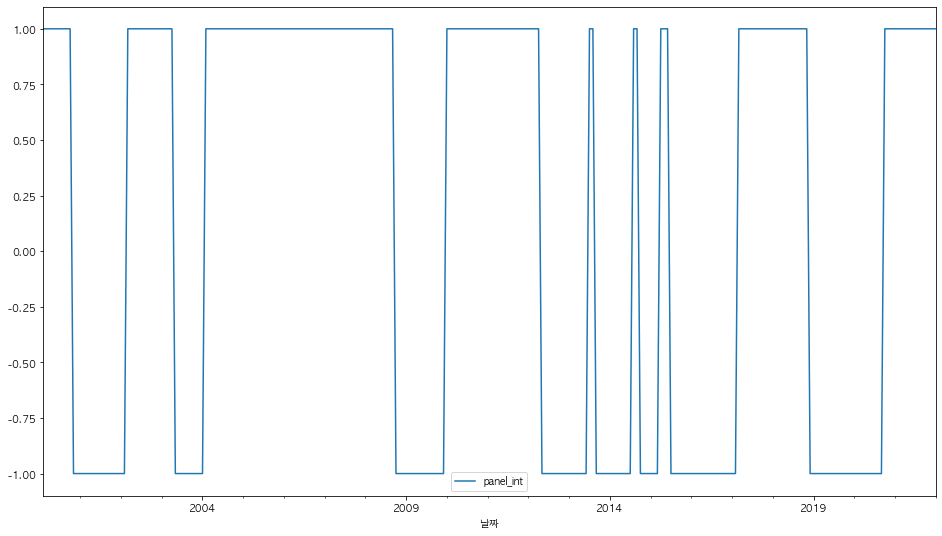

In [27]:
df_final['panel_int'] = df_final['panel'].map(lambda x: 1 if x=='강세장' else -1)
df_final[['panel_int']].plot(figsize=(16, 9))